Logs   
- [2023/03/08]   
  Restart this notebook if you change the scratch library

In [1]:
import enum
import numpy as np
import matplotlib.pyplot as plt

from tabulate import tabulate
from scipy import special as sc_special
from collections import Counter

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 16,
  'grid.alpha': 0.25})


## Dependence and Independence

We say that two events $E$ and $F$ are *dependent* if knowing something
about whether $E$ happens gives us information about whether $F$
happens (and vice versa). Otherwise, the are *independent*

Mathematically, we say that two events $E$ and $F$ are independent
if the probability that **they both happen** is the product of
the probabilities that each one happens:

$$
  P(E, F) = P(E) P(F)
$$

## Conditional Probability

If two events $E$ and $F$ are not necessarily independent (and if the
probability of $F$ is not zero), then we can defined the probability of
$E$ "conditional on $F$" as:

$$
  P(E|F) = \frac{P(E,F)}{P(F)}
$$

When $E$ and $F$ are independent, we have
$$
\begin{align*}
  P(E|F) &= \frac{P(E,F)}{P(F)} \\ 
         &= \frac{P(E) P(F)}{P(F)} \\
         &= P(E)
\end{align*}
$$
which is the mathematical way of expressing that knowing $F$ occurred gives
us no additional information whether $E$ occurrred.

### Example: a family with two (unknown) children

Assumption:
- Each child is equally likely to be a boy or a girl.
- The gender of the second child is independent of the gender
  of the first child.

In [3]:
table = [
  ["boy", "girl"],
  ["boy", "(boy, boy)", "(boy, girl)"],
  ["girl", "(girl, boy)", "(girl, girl)"]]

print(f"Possible outcomes")
print(tabulate(table, headers="firstrow", tablefmt="simple"))

Possible outcomes
      boy          girl
----  -----------  ------------
boy   (boy, boy)   (boy, girl)
girl  (girl, boy)  (girl, girl)


- What is the probability of the event "both children are girls" ($B$)
  conditonal on the event "the older child is girl" ($G$).

  $$
    P(B|G) = \frac{P(B, G)}{P(G)} = \frac{P(B)}{P(G)}
           = \frac{1/4}{1/2} = \frac{1}{2}
  $$

  since the event $B$ and $G$ ("both children are girls *and* the older
  child is girl") is just the event $B$. (Once you know that both children
  are girls, it's necessarily true that the older child is a girl)

- What is the probability of the event "both children are girls" ($B$)
  conditional on the event "at least one of the children is a girl" ($L$)

  $$
    P(B|L) = \frac{P(B, G)}{P(L)} = \frac{P(B)}{P(L)}
           = \frac{1/4}{3/4} = \frac{1}{3}
  $$

We can also simulate the above questions using the following script

In [4]:
# An enum is a typed set of enumerated values.
# We can use them to make our code more descriptive
# and readable.

class Kid(enum.Enum):
  BOY = 0;
  GIRL = 1;

def random_kid(rng) -> Kid:
  return rng.choice([Kid.BOY, Kid.GIRL])

In [5]:
Kid.BOY

<Kid.BOY: 0>

In [6]:
rnd_seed = 2023_03_09
rng = np.random.default_rng(rnd_seed)

both_girls = 0
older_girl = 0
either_girl = 0

for _ in range(10_000):   # generate 10_000 pairs of children
  younger = random_kid(rng)
  older = random_kid(rng)

  if older == Kid.GIRL:
    older_girl += 1
  if older == Kid.GIRL and younger == Kid.GIRL:
    both_girls += 1
  if older == Kid.GIRL or younger == Kid.GIRL:  # at least one girl
    either_girl += 1

print(f"P(both | older): {both_girls / older_girl}")
print(f"P(both | either): {both_girls / either_girl}")


P(both | older): 0.5029216199879105
P(both | either): 0.332888770338757


## Bayes's Theorem

We can think this theorem as a way of "reversing" conditional probabilities.

Using the definition of conditional probability twice, we have the following Bayes' theorem:

$$
  P(E|F) = \frac{P(E,F)}{P(F)}
         = \frac{P(F|E) P(E)}{P(F)}
$$

We can rewrite the above formulation without $P(F)$. 
The event $F$ can be split into two mutually exclusive events 
(see [Kolmogorov axioms: $\sigma$-additivity](https://en.wikipedia.org/wiki/Probability_axioms)):    
"$F$ and $E$" and "$F$ and not $E$".   
Using the notation $\neg E$ for "not $E$" (i.e., "$E$ doesn't happen"), then

$$
  P(F) = P(F, E) + P(F, \neg E)
$$

so that:

$$
\begin{align*}
  P(E|F) &= \frac{P(F|E) P(E)}{P(F)}
         = \frac{P(F|E) P(E)}{P(F, E) + P(F, \neg E)} \\
         &= \frac{P(F|E) P(E)}{P(F|E) P(E) + P(F|\neg E) P(\neg E)}
\end{align*}
$$
in the last step, we use the definition of conditional probability

### Example: Test positive and disease

Imagine a certain disease that affects 1 in every 10,000 people.  
And imagine that there is a test for this disease that gives the correct
result ("diseased" if you have the disease, "nondiseased" if you don't)
99% of the time.

What does a positive test meant?

Let's use $T$ for the event "your test is positive"    
and $D$ for the event "you have the disease." Then Bayes's theorem
says that the probability that you have the disease, condtional on
testing positive, is:

$$
  P(D|T) = \frac{P(T|D) P(D)}{P(T|D) P(D) + P(T|\neg D) P(\neg D)}
$$

- $P(T|D)$ is the probability that someone with the disease test positive
  (99% = 0.99)
- $P(D)$ is the probability that any given person has the disease
  (1/10,000 = 0.0001)
- $P(T|\neg D)$ is the probability that someone without the disease
  tests positive (100% - 99% = 1% = 0.01)
- $P(\neg D)$ is the probability that any given person doesn't have the
  disease ((10,000-1)/10,000 = 0.9999)

Substitute the numbers into Bayes's theorem, we find

$$
  P(D|T) = \frac{(0.99) \,(0.0001)}{(0.99)\,(0.0001) + (0.01)\,(0.9999)} 
         = 0.0098
         = 0.98\%
$$

That is, less than 1% of the people who test positive actually have
the disease.

In [7]:
(0.99 * 0.0001)/ (0.99 * 0.0001 + 0.01 *0.9999)

99/(99 + 9999)

0.00980392156862745

To do: Please make a visualization, why is the difference about 0.02%
between $P(T|D)$ and $P(D|T)$. (Explanation from the textbook is not helpful enough)

Fortunately, 3Blue1Brown makes a nice video about it: [The medical test paradox, and redesigning Bayes' rule](https://www.youtube.com/watch?v=lG4VkPoG3ko)

Short answer: $P(T|D)$ is the probability of someone with disease test positive.
We start from the prior distribution ($P(D)$) the probability that someone with disease.
After the test, we update our belief and it also change the distribution
into posterior distribution: $P(D|T)$ someone who take the test and actually have disease

In one sentence, the paradox is called "veredicial paradox" (it is correct, but
it seems false). Or accuracy $\neq$ predictivity

The following figure may help us to understand the reduction (from 0.99 to 0.98)

<img src="./img-resources/bayes-theorem-disease.drawio.png" width=1000></img>

## Random Variables

A *random variable* is a variable whose possible values have an associated
probability distribution.    
An *expected value* of a random variable is the average of its values
weighted by their probabilities.

## Continuous Distributions

In [8]:
def uniform_pdf(x: float) -> float:
  return 1 if 0 <= x < 1 else 0

def uniform_cdf(x: float) -> float:
  """Returns the probability that a uniform random variable is <= x"""
  if x < 0:
    return 0      # uniform random is never less than 0
  elif x < 1:
    return x      # e.g. P(X <= 0.4) = 0.4
  else:
    return 1      # uniform random is always less than 1

## The Normal Distributions

$$
  f(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi}\, \sigma}
                    \exp\left(- \frac{(x-\mu)^2}{2\sigma^2}\right)
$$

$$
  F(x|\mu, \sigma) = \frac{1}{2} \left[ 
      1 + \operatorname{erf}\left(\frac{x - \mu}{\sigma\sqrt{2}}\right) 
    \right]
$$

$$
  F^{-1}(p|\mu, \sigma) = 
    \mu + \sigma \sqrt(2) \operatorname{erf}^{(-1)} (2p - 1), 
    \quad p \in (0, 1)
$$

In [9]:
def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
  return (1/(np.sqrt(2*np.pi) * sigma)) \
    * np.exp(-(x - mu)**2 / (2*sigma**2))

In [10]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
  return 0.5 * (1 + sc_special.erf((x - mu) / (sigma * np.sqrt(2))))

In [11]:
def inverse_normal_cdf(p: float, mu: float = 0, sigma: float = 1, 
  tolerance: float = 1e-5) -> float:

  """Find approximate inverse using binary search"""

  # if not standard, compute standard and rescale
  if abs(mu) > 1e-5 or abs(sigma - 1) > 1e-5:
    return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

  low_z = -10.0         # normal_cdf(-10) is (very close to) 0
  high_z = 10.0         # normal_cdf(10) is (very close to) 1

  while high_z - low_z > tolerance:
    mid_z = (low_z + high_z) / 2      # Consider the midpoint
    mid_p = normal_cdf(mid_z)         # and the CDF's value there
    if mid_p < p:
      low_z = mid_z                   # Midpoint too low search above it
    else:
      high_z = mid_z                  # Midpoint to high, search below it

  return mid_z

def inverse_normal_cdf_with_scipy(
  p: float, mu: float = 0, sigma: float = 1) -> float:

  return mu + sigma * np.sqrt(2) * sc_special.erfinv(2*p - 1)

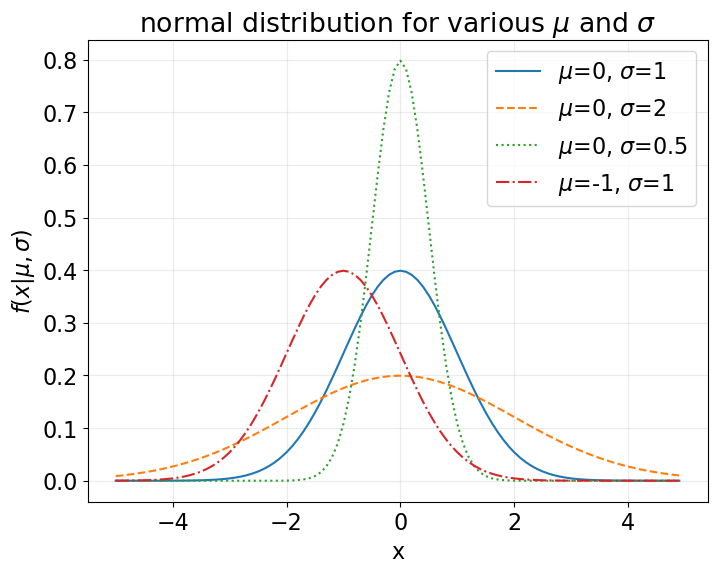

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

xs = [x / 10.0 for x in range(-50, 50)]

ax.plot(xs, [normal_pdf(x, sigma=1) for x in xs],
  '-', label=r"$\mu$=0, $\sigma$=1")
ax.plot(xs, [normal_pdf(x, sigma=2) for x in xs],
  '--', label=r"$\mu$=0, $\sigma$=2")
ax.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs],
  ':', label=r"$\mu$=0, $\sigma$=0.5")
ax.plot(xs, [normal_pdf(x, mu=-1) for x in xs],
  "-.", label=r"$\mu$=-1, $\sigma$=1")

ax.set_xlabel("x")
ax.set_ylabel(r"$f(x|\mu,\sigma)$")
ax.set_title(f"normal distribution for various $\mu$ and $\sigma$")

ax.grid("on")
ax.legend(loc="best")
plt.show(fig)

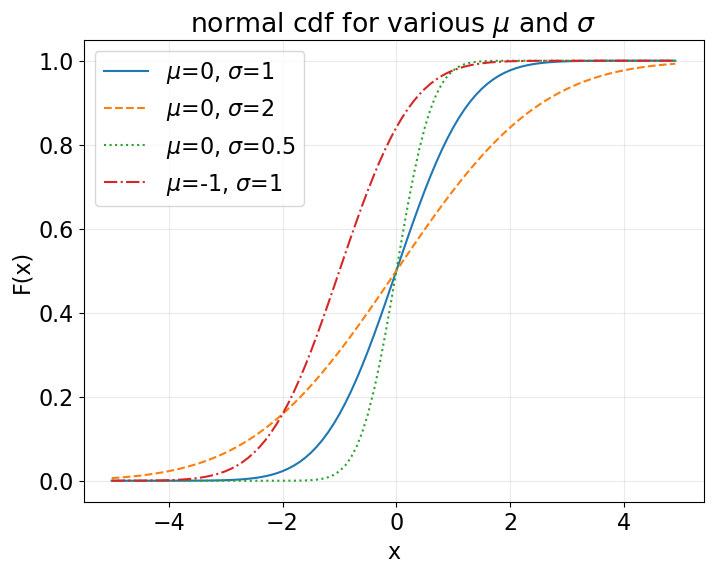

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

xs = [x / 10.0 for x in range(-50, 50)]

ax.plot(xs, [normal_cdf(x, sigma=1) for x in xs],
  '-', label=r"$\mu$=0, $\sigma$=1")
ax.plot(xs, [normal_cdf(x, sigma=2) for x in xs],
  '--', label=r"$\mu$=0, $\sigma$=2")
ax.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs],
  ':', label=r"$\mu$=0, $\sigma$=0.5")
ax.plot(xs, [normal_cdf(x, mu=-1) for x in xs],
  "-.", label=r"$\mu$=-1, $\sigma$=1")

ax.set_xlabel("x")
ax.set_ylabel("F(x)")
ax.set_title(f"normal cdf for various $\mu$ and $\sigma$")

ax.grid("on")
ax.legend(loc="best")
plt.show(fig)

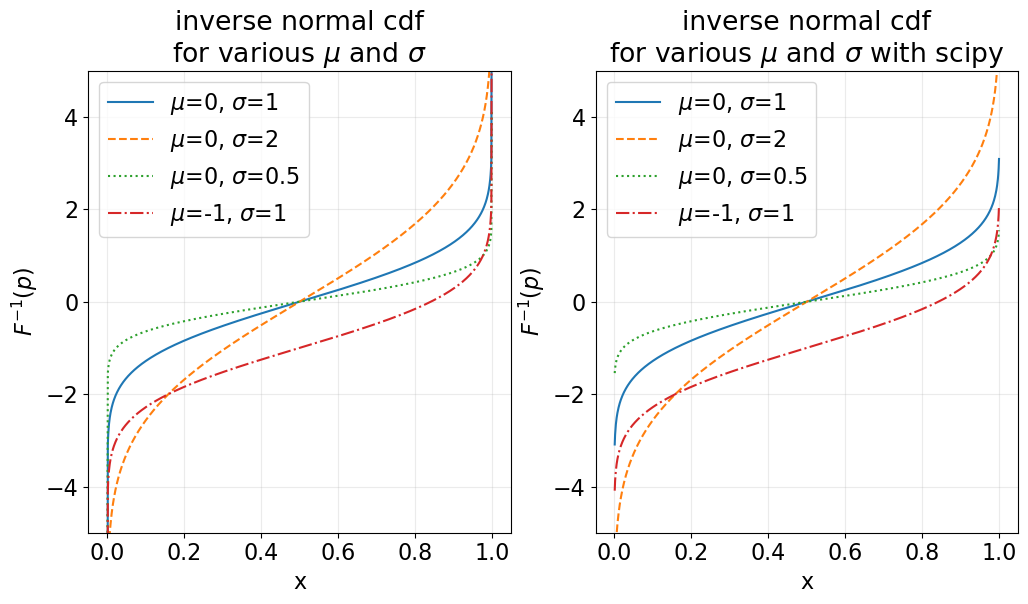

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

xs = np.linspace(0, 1, 1000)

axes[0].plot(xs, [inverse_normal_cdf(p, sigma=1) for p in xs],
  '-', label=r"$\mu$=0, $\sigma$=1")
axes[0].plot(xs, [inverse_normal_cdf(p, sigma=2) for p in xs],
  '--', label=r"$\mu$=0, $\sigma$=2")
axes[0].plot(xs, [inverse_normal_cdf(p, sigma=0.5) for p in xs],
  ':', label=r"$\mu$=0, $\sigma$=0.5")
axes[0].plot(xs, [inverse_normal_cdf(p, mu=-1) for p in xs],
  "-.", label=r"$\mu$=-1, $\sigma$=1")

axes[0].set_xlabel("x")
axes[0].set_ylabel(r"$F^{-1}(p)$")
# ax.set_yscale("symlog")
axes[0].set_ylim([-5, 5])
axes[0].set_title(f"inverse normal cdf\nfor various $\mu$ and $\sigma$")

axes[0].grid("on")
axes[0].legend(loc="best")


axes[1].plot(xs, [inverse_normal_cdf_with_scipy(p, sigma=1) for p in xs],
  '-', label=r"$\mu$=0, $\sigma$=1")
axes[1].plot(xs, [inverse_normal_cdf_with_scipy(p, sigma=2) for p in xs],
  '--', label=r"$\mu$=0, $\sigma$=2")
axes[1].plot(xs, [inverse_normal_cdf_with_scipy(p, sigma=0.5) for p in xs],
  ':', label=r"$\mu$=0, $\sigma$=0.5")
axes[1].plot(xs, [inverse_normal_cdf_with_scipy(p, mu=-1) for p in xs],
  "-.", label=r"$\mu$=-1, $\sigma$=1")

axes[1].set_xlabel("x")
axes[1].set_ylabel(r"$F^{-1}(p)$")
# ax.set_yscale("symlog")
axes[1].set_ylim([-5, 5])
axes[1].set_title(f"inverse normal cdf\nfor various $\mu$ and $\sigma$ with scipy")

axes[1].grid("on")
axes[1].legend(loc="best")


plt.show(fig)


## The Central Limit Theorem

A random variable defined as the average of a large number
of independent and identically distributed random variables
is itself approximately normally distributed

In [15]:
def bernoulli_trial(p: float, rng) -> int:
  """Returns 1 with probability p and 0 with probability 1-p""" 
  return 1 if rng.random() < p else 0 

In [16]:
def binomial(n: int, p: float, rng) -> int:
  """Returns the sum of n bernoulli(p) trials""" 
  return sum(bernoulli_trial(p, rng) for _ in range(n))

In [22]:
def binomial_histogram(p: float, n: int, num_points: int, rng) -> None:
  """Picks points from a binomial(n, p) and plots their histogram""" 
  data = [binomial(n, p, rng) for _ in range(num_points)]

  fig, ax = plt.subplots(figsize=(8, 6))

  histogram = Counter(data)
  ax.bar(
    [x  for x in histogram.keys()],
    [v / num_points for v in histogram.values()],
    0.8, color='0.75', label=None
  )

  mu = p * n 
  sigma = np.sqrt(n * p * (1 - p))

  # use a line chart to show the normal approximation
  xs = np.linspace(min(data), max(data), 200)
  ys = [normal_pdf(i, mu, sigma) for i in xs]
  
  ax.plot(xs, ys, label="normal dist.")

  ax.set_xlabel("x")
  ax.set_title("Binomial dist. vs. normal approx.")
  ax.grid("on")
  ax.legend(loc="best")

  plt.show(fig)

  return None

### Comparison between binomial distribution and normal distribution

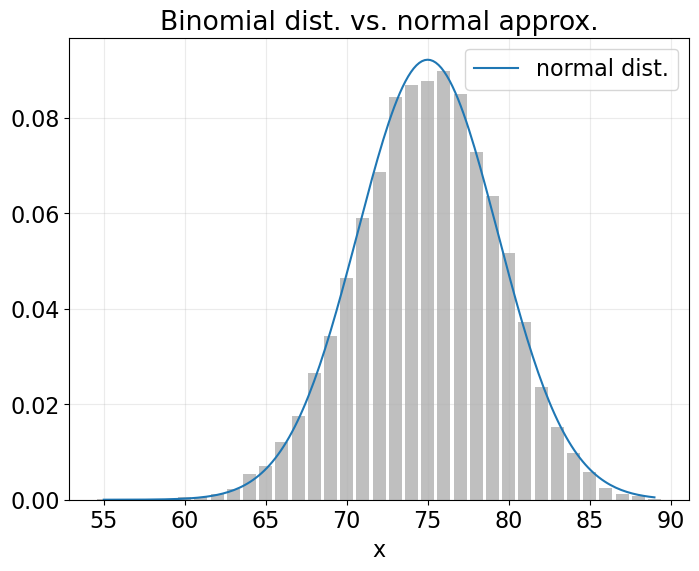

In [27]:
p_binom = 0.75
n_binom = 100
binomial_histogram(p_binom, n_binom, 10_000, rng)